# Image Denoising Challenge

The goal for this challenge is to leverage your knowledge of Deep Learning to design and train a denoising model. For a given noisy image $X$, our model should learn to predict the denoised image $y$.


**Objectives**
- Visualize images
- Preprocess images for the neural network
- Fit a custom CNN for the task

## 1. Load Data

👉 Let's download the dataset archive.
It contains RGB and Black & White images we will be using for the rest of this challenge.

In [1]:
! curl https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/paintings.zip > paintings.zip
! unzip -nq "paintings.zip" 
! rm "paintings.zip"
! ls -l

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 21 90.1M   21 19.2M    0     0  23.6M      0  0:00:03 --:--:--  0:00:03 23.6M
 86 90.1M   86 78.2M    0     0  43.1M      0  0:00:02  0:00:01  0:00:01 43.1M
100 90.1M  100 90.1M    0     0  43.3M      0  0:00:02  0:00:02 --:--:-- 43.3M


total 408
-rw-r--r-- 1 adric 197609 20937 juin  30 09:01 image_denoising.ipynb
drwxr-xr-x 1 adric 197609     0 juin   9 15:06 paintings
-rw-r--r-- 1 adric 197609     0 juin  29 09:16 README.md
drwxr-xr-x 1 adric 197609     0 juin  29 09:16 tests


In [3]:
import glob
dataset_paths = glob.glob("./paintings/*.jpg")
dataset_paths

['./paintings\\Albrecht_Duâ\x95\xa0Ãªrer_107.jpg',
 './paintings\\Albrecht_Duâ\x95\xa0Ãªrer_114.jpg',
 './paintings\\Albrecht_Duâ\x95\xa0Ãªrer_121.jpg',
 './paintings\\Albrecht_Duâ\x95\xa0Ãªrer_129.jpg',
 './paintings\\Albrecht_Duâ\x95\xa0Ãªrer_136.jpg',
 './paintings\\Albrecht_Duâ\x95\xa0Ãªrer_143.jpg',
 './paintings\\Albrecht_Duâ\x95\xa0Ãªrer_150.jpg',
 './paintings\\Albrecht_Duâ\x95\xa0Ãªrer_158.jpg',
 './paintings\\Albrecht_Duâ\x95\xa0Ãªrer_165.jpg',
 './paintings\\Albrecht_Duâ\x95\xa0Ãªrer_17.jpg',
 './paintings\\Albrecht_Duâ\x95\xa0Ãªrer_172.jpg',
 './paintings\\Albrecht_Duâ\x95\xa0Ãªrer_187.jpg',
 './paintings\\Albrecht_Duâ\x95\xa0Ãªrer_194.jpg',
 './paintings\\Albrecht_Duâ\x95\xa0Ãªrer_200.jpg',
 './paintings\\Albrecht_Duâ\x95\xa0Ãªrer_208.jpg',
 './paintings\\Albrecht_Duâ\x95\xa0Ãªrer_215.jpg',
 './paintings\\Albrecht_Duâ\x95\xa0Ãªrer_22.jpg',
 './paintings\\Albrecht_Duâ\x95\xa0Ãªrer_222.jpg',
 './paintings\\Albrecht_Duâ\x95\xa0Ãªrer_237.j

❓ **Display the image at index `53` of this dataset_paths (i.e the 54-th image)**

<details>
    <summary>Hint</summary>
    Use the <code>PIL.Image.open</code> and <code>matplotlib.pyplot.imshow</code> functions.
</details>

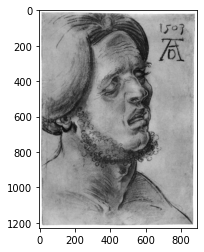

In [17]:
# YOUR CODE HERE
imagepath = dataset_paths[53]
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
#im = Image.open(imagepath) 
im = Image.open(imagepath).convert('RGB')
#img = mpimg.imread(imagepath)
plt.imshow(im)

❓ **What is the shape of the image you displayed above `img_shape`?  How many dimensions `img_dim` does it have ?**

In [20]:
# YOUR CODE HERE
img_shape = img.shape
img_dim = len(img.shape)

❓ **What was in the image above?**

In [21]:
img_shape = img_shape
img_dim = img_dim

# Uncomment the correct answer

is_portrait = True
#is_portrait = False

#is_colored_image = True
is_colored_image = False

In [22]:
from nbresult import ChallengeResult
result = ChallengeResult(
    'data_loading',
    img_shape=img_shape,
    img_dim=img_dim,
    is_portrait=is_portrait,
    is_colored_image=is_colored_image
)

result.write()

## 2. Processing

❓ **Store all images from the dataset folder in a list of numpy arrays called `dataset_images`**

- It can take a while
- If the dataset is too big to fit in memory, just take the first half (or quarter) of all pictures

In [41]:
# YOUR CODE HERE
import os
import numpy as np
import pandas as pd
def create_dataset(img_folder):
    newsize = (120, 100)
    img_data_array=[]
    
   
    for file in os.listdir(img_folder):
        
       
        image_path= file
        #print(image_path)
        im = Image.open(imagepath).convert('RGB')
        im = im.resize(newsize)
        im = np.array(im)
        im = im.astype('float32')
        im /= 255 
        
        
        
        img_data_array.append(im)
        
    dataset_images = np.array(img_data_array)
    return dataset_images
#dataset_images = 

In [42]:
img_folder = 'paintings'
dataset_images = create_dataset(img_folder)

### 2.1 Reshape, Resize, Rescale

Let's simplify our dataset and convert it to a single numpy array

In [43]:
for i in dataset_images:
    print(i.shape)

(100, 120, 3)
(100, 120, 3)
(100, 120, 3)
(100, 120, 3)
(100, 120, 3)
(100, 120, 3)
(100, 120, 3)
(100, 120, 3)
(100, 120, 3)
(100, 120, 3)
(100, 120, 3)
(100, 120, 3)
(100, 120, 3)
(100, 120, 3)
(100, 120, 3)
(100, 120, 3)
(100, 120, 3)
(100, 120, 3)
(100, 120, 3)
(100, 120, 3)
(100, 120, 3)
(100, 120, 3)
(100, 120, 3)
(100, 120, 3)
(100, 120, 3)
(100, 120, 3)
(100, 120, 3)
(100, 120, 3)
(100, 120, 3)
(100, 120, 3)
(100, 120, 3)
(100, 120, 3)
(100, 120, 3)
(100, 120, 3)
(100, 120, 3)
(100, 120, 3)
(100, 120, 3)
(100, 120, 3)
(100, 120, 3)
(100, 120, 3)
(100, 120, 3)
(100, 120, 3)
(100, 120, 3)
(100, 120, 3)
(100, 120, 3)
(100, 120, 3)
(100, 120, 3)
(100, 120, 3)
(100, 120, 3)
(100, 120, 3)
(100, 120, 3)
(100, 120, 3)
(100, 120, 3)
(100, 120, 3)
(100, 120, 3)
(100, 120, 3)
(100, 120, 3)
(100, 120, 3)
(100, 120, 3)
(100, 120, 3)
(100, 120, 3)
(100, 120, 3)
(100, 120, 3)
(100, 120, 3)
(100, 120, 3)
(100, 120, 3)
(100, 120, 3)
(100, 120, 3)
(100, 120, 3)
(100, 120, 3)
(100, 120, 3)
(100, 

❓ **First, check if that all the images in the dataset have the same number of dimensions**.
- What do you notice?
- How do you explain it? 

I suppose i should not have opened the img while converting to rgb
so i see same dimensions

but the difference would have been between black and white and colored image

In [559]:
# YOUR CODE HERE

👉 We convert for you all black & white images into 3-colored ones by duplicating the image on three channels, so as to have only 3D arrays

In [45]:
from tqdm import tqdm
dataset_images = [x if x.ndim==3 else np.repeat(x[:,:,None], 3, axis=2) for x in tqdm(dataset_images)]
set([x.ndim for x in dataset_images])

100%|██████████| 1085/1085 [00:00<00:00, 1087672.05it/s]


{3}

❓ **What about their shape now ?**
- Do they all have the same width/heights ? If not:
- Resize the images (120 pixels height and 100 pixels width) in the dataset, using `tensorflow.image.resize` function.
- Now that they all have the same shape, store them as a numpy array `dataset_resized`.
- This array should thus be of size $(n_{images}, 120, 100, 3)$

In [52]:
# YOUR CODE HERE
dataset_resized = np.array(dataset_images)

In [54]:
dataset_scaled = dataset_resized

In [55]:
dataset_resized.shape

(1085, 100, 120, 3)

❓ **Rescale the data of each image between $0$ and $1$**
- Save your resulting list as `dataset_scaled`

In [563]:
# YOUR CODE HERE

### 2.2 Create (X,y) sets

👉 Now, we'll add for you some **random noise** to our images to simulate noise (that our model will try to remove later)

In [56]:
NOISE_LEVEL = 0.2

dataset_noisy = np.clip(
    dataset_scaled + np.random.normal(
        loc=0,
        scale=NOISE_LEVEL,
        size=dataset_scaled.shape
    ).astype(np.float32),
    0,
    1
)
dataset_noisy.shape

(1085, 100, 120, 3)

❓ **Plot a noisy image below to visualize the noise and compare it with the normal one**

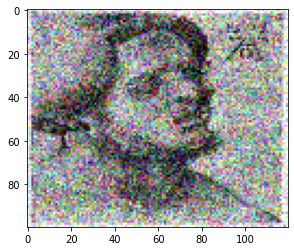

In [57]:
# YOUR CODE HERE
img = dataset_noisy[53]


plt.imshow(img)

❓ **Create your `(X_train, Y_train)`, `(X_test, Y_test)` training set for your problem**

- Remember you are trying to use "noisy" pictures in order to predict the "normal" ones.
- Keeping about `20%` of randomly sampled data as test set

In [60]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split
X = dataset_noisy
y = dataset_scaled
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [61]:
from nbresult import ChallengeResult
result = ChallengeResult(
    "preprocessing",
    X_train_shape = X_train.shape,
    Y_train_shape = Y_train.shape,
    X_std = X_train[:,:,:,0].std(),
    Y_std = Y_train[:,:,:,0].std(),
    first_image = Y_train[0]
)
result.write()

## 3. Convolutional Neural Network

A commonly used neural network architecture for image denoising is the __AutoEncoder__.

<img src='https://github.com/lewagon/data-images/blob/master/DL/autoencoder.png?raw=true'>

Its goal is to learn a compact representation of your data to reconstruct them as precisely as possible.  
The loss for such model must incentivize it to have __an output as close to the input as possible__.

For this challenge, __you will only be asked to code the Encoder part of the network__, since building a Decoder leverages layers architectures you are not familiar with (yet).

In [104]:
#👉 Run this code below if you haven't managed to build your own (X,Y) training sets. This will load them as solution

#```python
! curl https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/data_painting_solution.pickle > data_painting_solution.pickle

import pickle
with open("data_painting_solution.pickle", "rb") as file:
    (X_train, Y_train, X_test, Y_test) = pickle.load(file)
    
! rm data_painting_solution.pickle
#```

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0  298M    0  695k    0     0  1185k      0  0:04:17 --:--:--  0:04:17 1185k
  8  298M    8 26.0M    0     0  16.5M      0  0:00:17  0:00:01  0:00:16 16.5M
 19  298M   19 57.0M    0     0  22.1M      0  0:00:13  0:00:02  0:00:11 22.1M
 30  298M   30 90.2M    0     0  25.2M      0  0:00:11  0:00:03  0:00:08 25.2M
 42  298M   42  126M    0     0  27.7M      0  0:00:10  0:00:04  0:00:06 27.7M
 55  298M   55  164M    0     0  29.5M      0  0:00:10  0:00:05  0:00:05 32.9M
 68  298M   68  204M    0     0  31.0M      0  0:00:09  0:00:06  0:00:03 35.6M
 81  298M   81  244M    0     0  32.2M      0  0:00:09  0:00:07  0:00:02 37.4M
 91  298M   91  273M    0     0  31.8M      0  0:00:09  0:00:08  0:00:01 36.5M
100  298M  100  298M    0     0  31.3M      0  0:00

### 3.1 Architecture

👉 Run the cell below that defines the decoder

In [87]:
import tensorflow as tf
from tensorflow.keras import layers, losses, Sequential

In [88]:
# We choose to compress images into a latent_dimension of size 6000
latent_dimensions = 6000

# We build a decoder that takes 1D-vectors of size 6000 to reconstruct images of shape (120,100,3)
decoder = Sequential(name='decoder')
decoder.add(layers.Reshape((30, 25, 8), input_dim=latent_dimensions))
decoder.add(layers.Conv2DTranspose(filters=16, kernel_size=3, strides=2, padding="same", activation="relu"))
decoder.add(layers.Conv2DTranspose(filters=32, kernel_size=3, strides=2, padding="same", activation="relu"))
decoder.add(layers.Conv2D(filters=3, kernel_size=3, padding="same", activation="sigmoid"))
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 30, 25, 8)         0         
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 60, 50, 16)        1168      
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 120, 100, 32)      4640      
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 120, 100, 3)       867       
Total params: 6,675
Trainable params: 6,675
Non-trainable params: 0
_________________________________________________________________


❓ **Now, build the `encoder` that plugs correctly with the decoder defined above**. Make sure that:
- The output of your `encoder` is the same shape as the input of the `decoder`
- Use a convolutional neural network architecture without transfer learning
- Keep it simple
- Print model summary

In [89]:
# CODE HERE YOUR ENCODER ARCHITECTURE AND PRINT IT'S MODEL SUMMARY
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

# The encoding process
input_img = Input(shape=(120, 100, 3))  

############
# Encoding #
############
encoder = Sequential(name='encoder')

encoder = tf.keras.Sequential([
      layers.Input(shape=(120, 100, 3)),
      layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
      layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)])

## Conv1 #
#x = Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', padding='same')(input_img)
#x = MaxPooling2D(pool_size = (2, 2), padding='same')(x)
#
## Conv2 #
#x = Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', padding='same')(x)
#x = MaxPooling2D(pool_size = (2, 2), padding='same')(x) 
#
## Conv 3 #
#x = Conv2D(filters = 8,kernel_size = (3, 3), activation='relu', padding='same')(x)
#
#encoded = MaxPooling2D(pool_size = (2, 2), padding='same')(x)


encoder.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 60, 50, 16)        448       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 30, 25, 8)         1160      
Total params: 1,608
Trainable params: 1,608
Non-trainable params: 0
_________________________________________________________________


👉 **Test your encoder below**

In [90]:
# HERE WE BUILD THE AUTO-ENCODER (ENCODER + DECODER) FOR YOU. IT SHOULD PRINT A NICE SUMMARY
from tensorflow.keras.models import Model

x = layers.Input(shape=(120, 100, 3))
autoencoder = Model(x, decoder(encoder(x)), name="autoencoder")
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 120, 100, 3)]     0         
_________________________________________________________________
sequential_3 (Sequential)    (None, 30, 25, 8)         1608      
_________________________________________________________________
decoder (Sequential)         (None, 120, 100, 3)       6675      
Total params: 8,283
Trainable params: 8,283
Non-trainable params: 0
_________________________________________________________________


### 3.2 Training

❓ **Before training the autoencoder, evaluate your baseline score**
- We will use the mean absolute error in this challenge
- Compute the baseline score on your test set in the "stupid" case where you don't manage to de-noise anything at all.
- Store the result under `score_baseline`

In [115]:
# YOUR CODE HERE
from sklearn.metrics import mean_absolute_error
y_true = Y_test
y_pred = X_test
print(y_pred.shape)
y_true = y_true.reshape((len(y_true), np.prod(y_true.shape[1:])))
y_pred = y_pred.reshape((len(y_pred), np.prod(y_pred.shape[1:])))

score_baseline = mean_absolute_error(y_true, y_pred)
print(score_baseline)

(217, 120, 100, 3)
0.14132798


❓ Now, **train your autoencoder**

- Use an appropriate loss
- Adapt the learning rate of your optimizer if convergence is too slow/fast
- Make sure your model does not overfit with appropriate control techniques

💡 You will not be judged by the computing power of your computer, you can reach decent performance in less than 5 minutes of training without GPUs.

In [94]:
# YOUR CODE HERE
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [106]:
from keras.callbacks import TensorBoard
#X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
#y_train = y_train.reshape((len(y_train), np.prod(y_train.shape[1:])))
history = autoencoder.fit(X_train, Y_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, Y_test),
               callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])


Epoch 1/10
4/4 [==============================] - 9s 2s/step - loss: 0.5553 - val_loss: 0.5576
Epoch 2/10
4/4 [==============================] - 8s 2s/step - loss: 0.5549 - val_loss: 0.5571
Epoch 3/10
4/4 [==============================] - 8s 2s/step - loss: 0.5544 - val_loss: 0.5567
Epoch 4/10
4/4 [==============================] - 8s 2s/step - loss: 0.5541 - val_loss: 0.5564
Epoch 5/10
4/4 [==============================] - 8s 2s/step - loss: 0.5537 - val_loss: 0.5560
Epoch 6/10
4/4 [==============================] - 8s 2s/step - loss: 0.5534 - val_loss: 0.5558
Epoch 7/10
4/4 [==============================] - 8s 2s/step - loss: 0.5532 - val_loss: 0.5555
Epoch 8/10
4/4 [==============================] - 8s 2s/step - loss: 0.5530 - val_loss: 0.5554
Epoch 9/10
4/4 [==============================] - 8s 2s/step - loss: 0.5527 - val_loss: 0.5551
Epoch 10/10
4/4 [==============================] - 8s 2s/step - loss: 0.5524 - val_loss: 0.5548


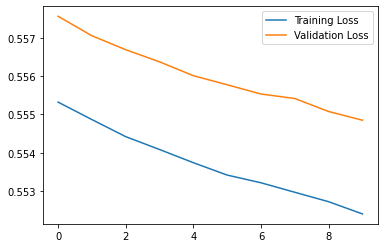

In [113]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()


❓ **Plot your training and validation loss at each epoch using the cell below**

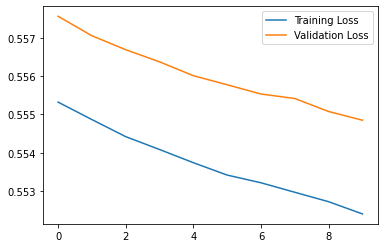

In [114]:
# Plot below your train/val loss history
# YOUR CODE HERE
# YOUR CODE HERE
# YOUR CODE HERE
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")



# Run also this code to save figure as jpg in path below (it's your job to ensure it works)
fig = plt.gcf()
fig = plt.legend()
plt.savefig("tests/history.png")

❓ **Evaluate your performances on test set**
- Compute your de-noised test set `Y_pred` 
- Store your test score as `score_test`
- Plot a de-noised image from your test set and compare it with the original and noisy one using the cell below

In [119]:
# YOUR CODE HERE
Y_pred = autoencoder.predict(Y_test)
score_test = autoencoder.evaluate(X_test, Y_test, verbose=1)


7/7 [==============================] - 0s 71ms/step - loss: 0.5548


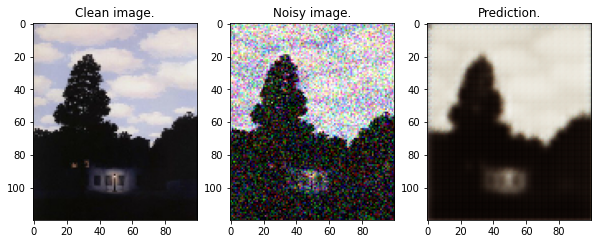

In [120]:
# RUN THIS CELL TO CHECK YOUR RESULTS
idx = 0

fig, axs = plt.subplots(1,3, figsize=(10,5))
axs[0].imshow(Y_test[idx])
axs[0].set_title("Clean image.")

axs[1].imshow(X_test[idx])
axs[1].set_title("Noisy image.")

axs[2].imshow(Y_pred[idx])
axs[2].set_title("Prediction.")

# Run this to save your results for correction
plt.savefig('tests/image_denoised.png')

🧪 **Send your results below**

In [121]:
from nbresult import ChallengeResult

result = ChallengeResult(
    "network",
    input_shape = list(encoder.input.shape),
    output_shape = list(encoder.output.shape),
    layer_names = [layer.name for layer in encoder.layers],
    trainable_params = sum([tf.size(w_matrix).numpy() for w_matrix in encoder.trainable_variables]),
    score_baseline = score_baseline,
    score_test = score_test,
)
result.write()